In [18]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías de machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("C:/Users/user/Desktop/Machine Learning/datos_pobreza.csv", encoding='cp1252')

In [3]:
dataset.head()

,Entidad Federativa,Poblacion,Nacimientos,Defunciones,Muertes Fetales,Muertes Maternas,Poblacion asegurada,Personas pobreza,Personas en pobreza extrema,Coeficiente GINI,Habitaciones por persona,Satisfacción con tiempo para ocio,Niveles de educación
0,AGS,1453452,21050,9712,341,10,794415,351529,15649,0.403162,1.1,7.8,48.2
1,BC,3690160,45075,28596,660,31,2298693,848437,59299,0.354443,1.1,7.8,49.6
2,BCS,821059,9867,5925,111,6,501431,151742,12583,0.372873,1.0,7.9,52.3
3,CAMP,1017011,12365,7509,158,9,487333,440423,93046,0.406862,0.9,7.8,44.6
4,COAH,3261259,44410,23814,501,27,2284366,691129,44529,0.368339,1.2,8.1,48.6


In [4]:
# Ver las columnas principales (nombres de las columnas)
print(dataset.columns)

Index(['Entidad Federativa', 'Poblacion', 'Nacimientos', 'Defunciones',
       'Muertes Fetales', 'Muertes Maternas', 'Poblacion asegurada',
       'Personas pobreza', 'Personas en pobreza extrema', 'Coeficiente GINI',
       'Habitaciones por persona', 'Satisfacción con tiempo para ocio',
       'Niveles de educación'],
      dtype='object')


In [5]:
columns_to_plot = ['Poblacion', 'Nacimientos', 'Defunciones', 'Muertes Fetales', 
                   'Muertes Maternas', 'Poblacion asegurada', 'Personas pobreza', 
                   'Personas en pobreza extrema', 'Coeficiente GINI', 'Habitaciones por persona', 
                   'Satisfacción con tiempo para ocio', 'Niveles de educación']

In [13]:
# 4. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Hacer predicciones
y_pred = model.predict(X_test)

# 7. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio:", mse)
print("R^2:", r2)

Error cuadrático medio: 1.3150791529656767e-18
R^2: 1.0


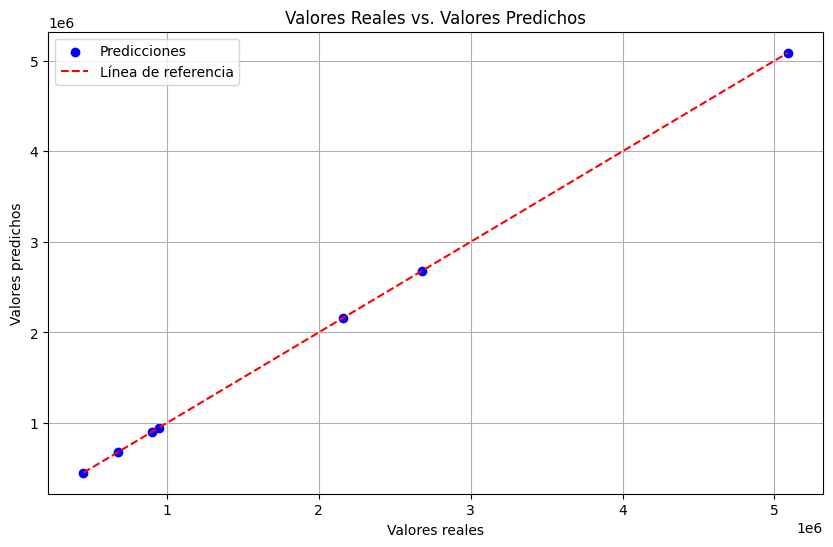

In [14]:
# 8. Graficar los resultados
# Gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.legend()
plt.grid()
plt.show()

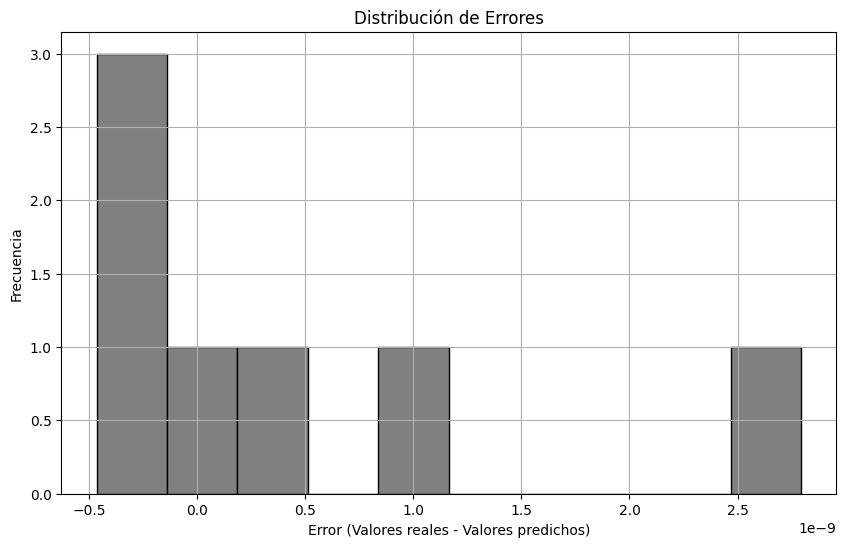

In [15]:
# Histograma de errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=10, color='gray', edgecolor='black')
plt.title('Distribución de Errores')
plt.xlabel('Error (Valores reales - Valores predichos)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

In [16]:
# 4. Definir la columna objetivo (y)
y = dataset['Personas pobreza']  # Cambia esto si deseas otra variable objetivo

# 5. Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Ver las dimensiones de los conjuntos resultantes para confirmar la división
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (25, 12)
Tamaño del conjunto de prueba: (7, 12)


In [19]:
# 5. Crear y entrenar el modelo
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 6. Hacer predicciones
y_pred = model.predict(X_test)

# 7. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio:", mse)
print("R^2:", r2)

Error cuadrático medio: 315147165348.7143
R^2: 0.86484468598007


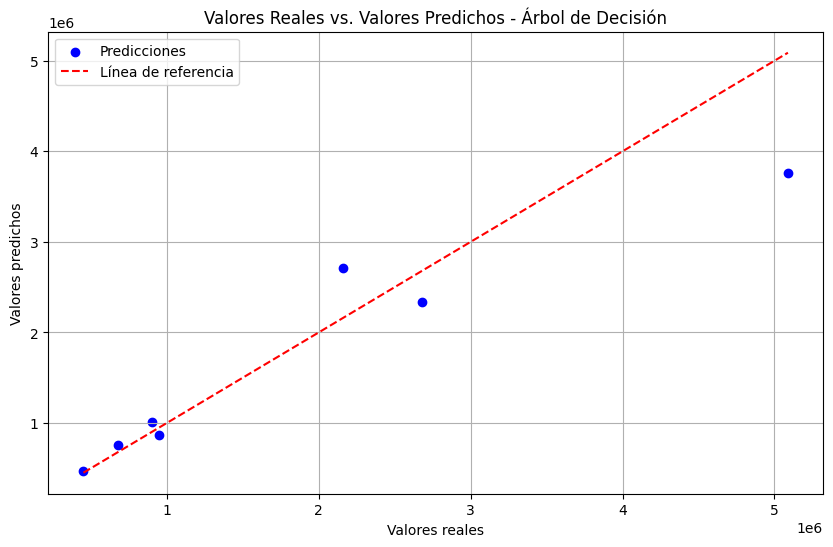

In [20]:
# 8. Graficar los resultados
# Gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores Reales vs. Valores Predichos - Árbol de Decisión')
plt.legend()
plt.grid()
plt.show()

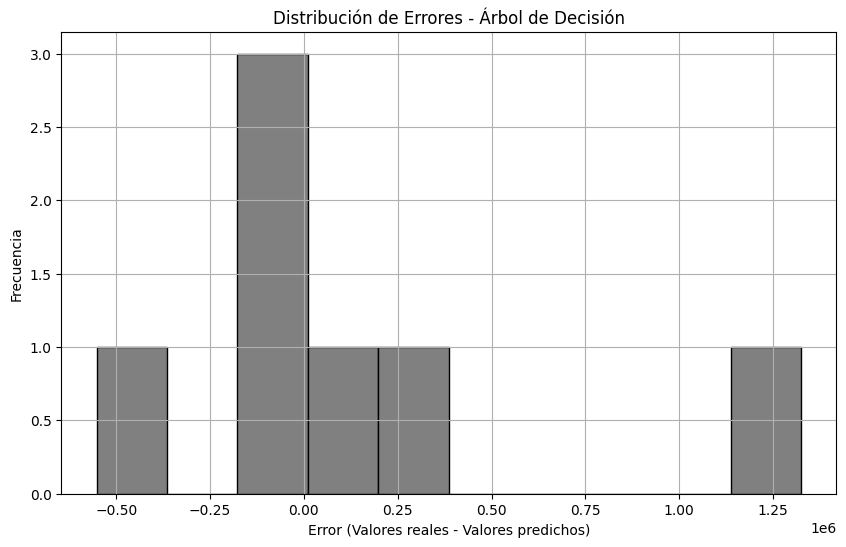

In [21]:
# Histograma de errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=10, color='gray', edgecolor='black')
plt.title('Distribución de Errores - Árbol de Decisión')
plt.xlabel('Error (Valores reales - Valores predichos)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()